In [24]:
import seaborn as sns
import pandas as pd

In [25]:
df = pd.read_csv("../data/processed_data.csv")

In [26]:
df_numeric = df.drop(['Unnamed: 0', 'Occupation', 'Blood Pressure','Person ID','Daily Steps','Physical Activity Level'], axis=1)


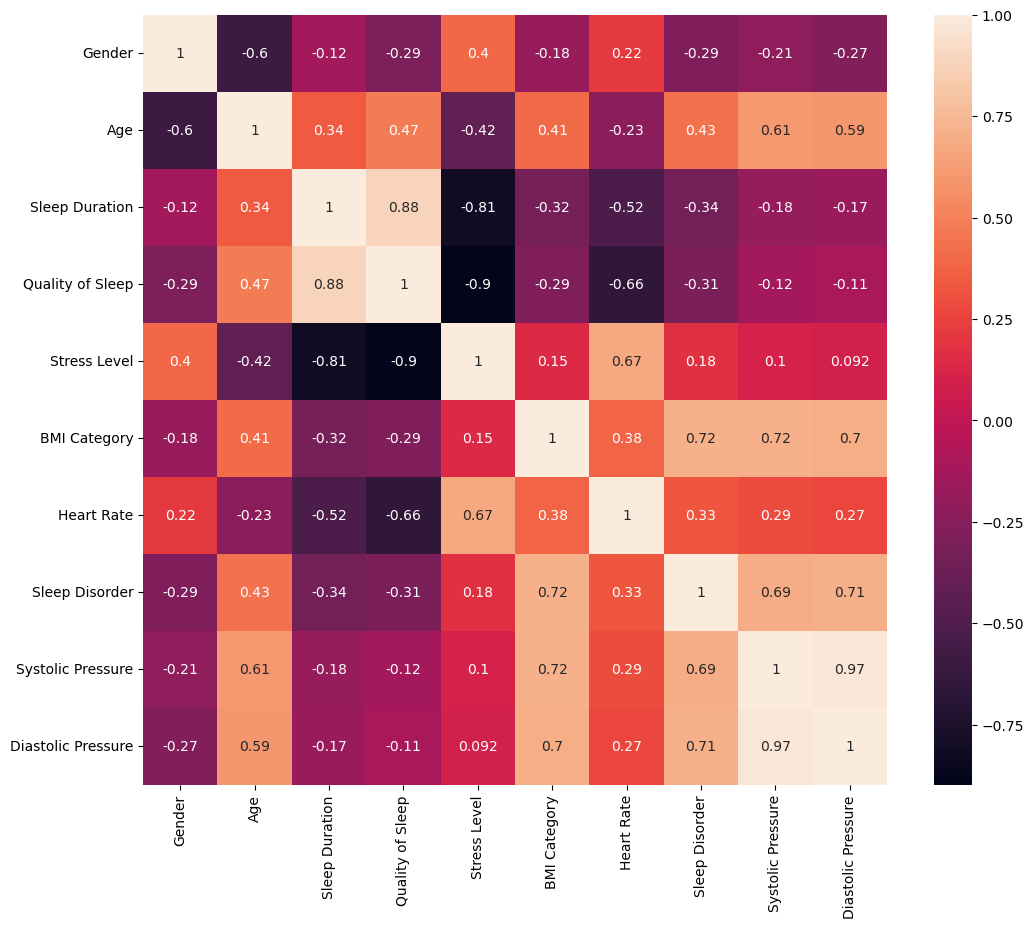

In [27]:
df_numeric_normalized=df_numeric/df_numeric.max()
corr=df_numeric_normalized.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(corr,annot=True)
plt.show()


In [28]:
#Stress level based upon Sleep duration and quality of sleep
X=df_numeric.loc[:,['Quality of Sleep','Sleep Duration']].to_numpy()
y=df_numeric.loc[:,['']]

KeyError: "None of [Index([''], dtype='object')] are in the [columns]"